In [1]:
# Titanic Survival Analysis - Kaggle Sample Notebook

## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style for better visualizations
sns.set_style('whitegrid')

In [2]:
## 2. Load the Dataset
# On Kaggle, the data would be in /kaggle/input/titanic/
# For this example, I can show how to load it
print("Loading Titanic dataset...")
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

Loading Titanic dataset...


In [3]:
## 3. Explore the Data
print("\n=== Dataset Overview ===")
print(f"Training set shape: {train_df.shape}")
print("\nFirst few rows:")
print(train_df.head())
print("\nDataset Info:")
print(train_df.info())
print("\nStatistical Summary:")
print(train_df.describe())


=== Dataset Overview ===
Training set shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000

In [4]:
## 4. Check for Missing Values
print("\n=== Missing Values ===")
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])



=== Missing Values ===
Age         177
Cabin       687
Embarked      2
dtype: int64



=== Creating Visualizations ===


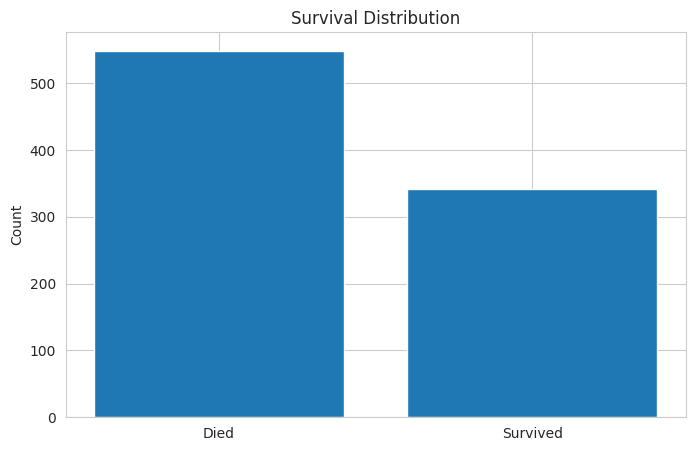

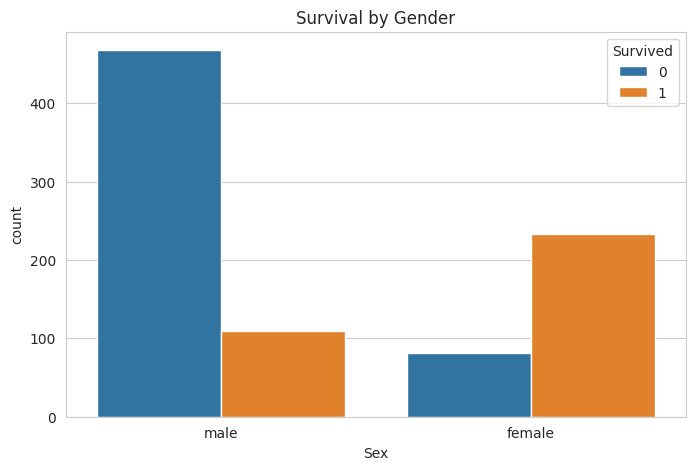

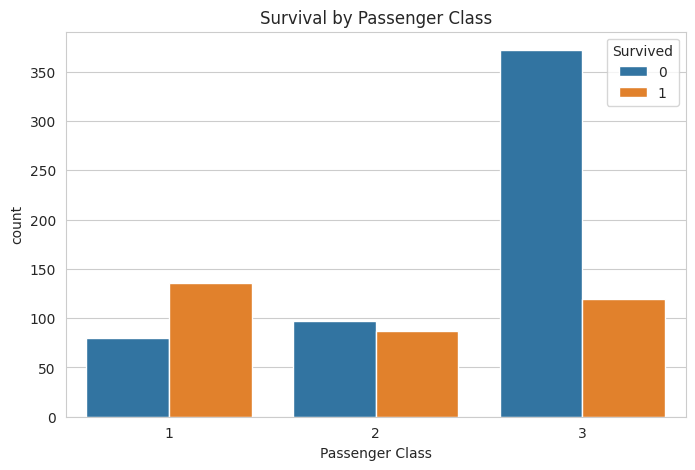

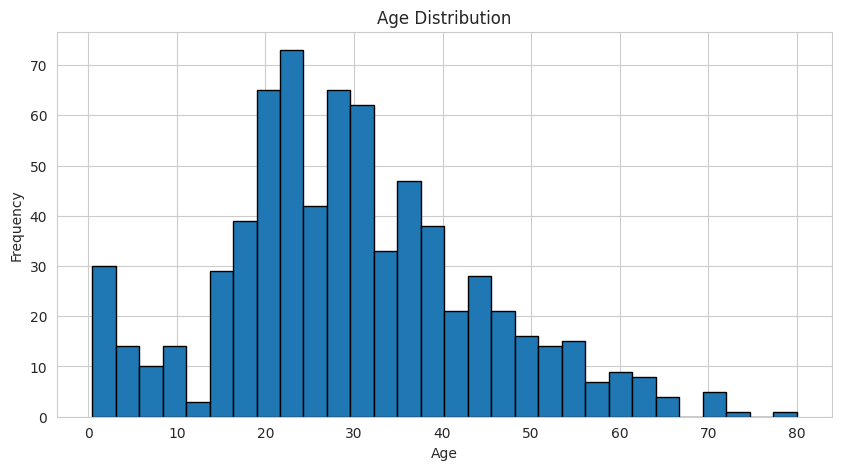

In [5]:
## 5. Data Visualization
print("\n=== Creating Visualizations ===")

# Survival Rate
plt.figure(figsize=(8, 5))
survival_counts = train_df['Survived'].value_counts()
plt.bar(['Died', 'Survived'], survival_counts.values)
plt.title('Survival Distribution')
plt.ylabel('Count')
plt.show()

# Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

# Survival by Class
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 5))
train_df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [6]:
## 6. Data Preprocessing
print("\n=== Data Preprocessing ===")

# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Convert categorical variables to numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']



=== Data Preprocessing ===


/tmp/ipykernel_24/94925494.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipykernel_24/94925494.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [7]:
## 7. Split Data for Training and Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")


Training set: (712, 7)
Validation set: (179, 7)


In [8]:
## 8. Build and Train Model
print("\n=== Training Model ===")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")



=== Training Model ===
Model trained successfully!



=== Model Evaluation ===
Validation Accuracy: 0.8268

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



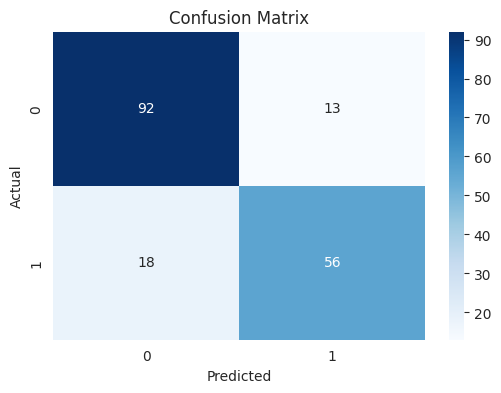

In [9]:
## 9. Make Predictions and Evaluate
print("\n=== Model Evaluation ===")
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

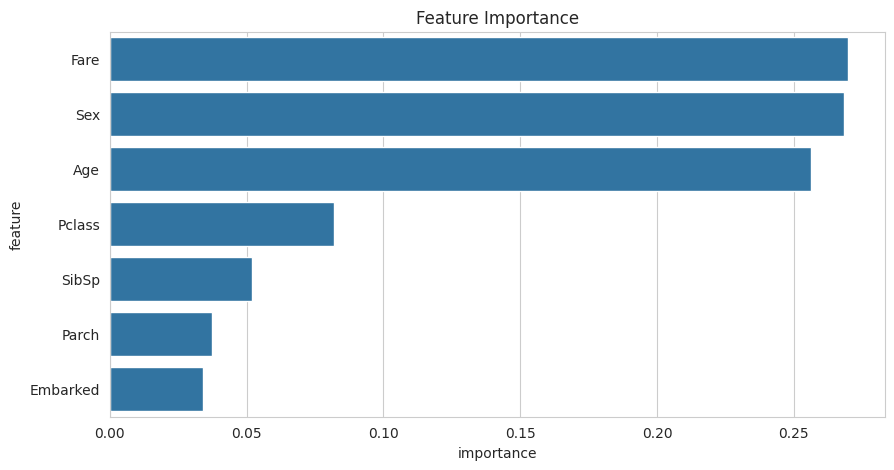

In [10]:
## 10. Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

In [11]:
## Create Submission File

# 1. Load the test dataset
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# 2. Store PassengerId for submission
passenger_ids = test_df['PassengerId']

# 3. Preprocess test data (same as training data)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 4. Select the same features used in training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test = test_df[features]

# 5. Make predictions
predictions = model.predict(X_test)

# 6. Create submission dataframe
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# 7. Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")
print(f"Total predictions: {len(submission)}")
print(submission.head())

Submission file created successfully!
Total predictions: 418
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0


/tmp/ipykernel_24/243502018.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
/tmp/ipykernel_24/243502018.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

# **The Logic Behind This Notebook**

**1. The Problem:**
We have historical data about Titanic passengers with outcomes we know (who survived). We want to find patterns so we can predict unknown cases.

**2. The Approach:**

Learn from history: Show the computer examples with answers ("this woman in first class survived," "this man in third class died")
Find patterns: Let the computer discover relationships (gender matters, class matters, age matters)
Test accuracy: See if the computer can correctly predict survival for passengers it hasn't seen before

**3. Why This Works:**
The Titanic disaster followed certain patterns:

Social norms (women and children first)
Physical factors (proximity to lifeboats, which varied by class)
Demographics (age, family size)

These patterns are consistent enough that a computer can learn them and make predictions with reasonable accuracy (usually 75-85% correct).

**4. Real-World Connection:**
This same logic applies to countless problems:

Will a customer buy a product? (based on past behavior)
Is this email spam? (based on previous spam patterns)
Will a patient respond to treatment? (based on similar patient outcomes)

The Key Insight: If patterns exist in historical data, machine learning can often find them and use them to make predictions about new situations. The Random Forest is particularly good at this because it doesn't rely on just one "opinion" but combines many perspectives to make a more reliable decision.

# **The Model: Random Forest Classifier**

**Think of it like asking advice from a group of experts:**
Imagine you're trying to decide if a Titanic passenger would survive. Instead of asking just one person, you ask 100 different "experts" (decision trees), and they all vote. The majority answer wins.

**How each "expert" (decision tree) thinks:**

* "Is this person female? If yes, higher chance of survival (women and children first!)"
* "If male, is he in first class? If yes, better chance than third class"
* "How old is the person? Younger children had priority"
Each tree asks different questions in different orders and comes to a conclusion

**Why it's called "Random Forest":**

1. Forest = Many trees (100 in our case)
2. Random = Each tree looks at random subsets of the data and features, so they don't all think exactly alike

**The voting process:**
If 70 out of 100 trees say "survived" and 30 say "died," the final prediction is "survived."

# **Here's a simple breakdown of what this notebook does:**

**The Goal:** Predict who survived the Titanic shipwreck based on passenger information like age, gender, ticket class, etc.

**Step-by-Step Process:**

**1. Import Tools** - Load all the Python libraries needed for data analysis and machine learning, like pandas for handling data and matplotlib for making charts.

**2. Load the Data** - Read the Titanic passenger information from CSV files. This includes details like name, age, gender, ticket class, and whether they survived.

**3. Explore the Data** - Take a first look at what the data contains. Check how many rows and columns there are, what the values look like, and identify any patterns.

**4. Find Missing Informatio**n - Some passengers have incomplete records (like missing age). We identify these gaps so we can fix them later.

**5. Visualize with Charts** - Create graphs to understand the data better. For example, charts showing that women survived more than men, or that first-class passengers had better survival rates.

**6. Clean the Data** - Fill in missing values (like using the average age for missing ages) and convert text to numbers (like changing "male"/"female" to 0/1) so the computer can understand it.

**7. Split the Data** - Divide the data into two parts: one for teaching the computer (training) and one for testing how well it learned (validation).

**8. Train the Model** - Use a Random Forest algorithm (think of it as creating many decision trees that vote together) to learn patterns from the training data about who survived.

**9. Test the Model** - See how accurately the model predicts survival on the validation data it hasn't seen before.

**10. Understand What Matters** - Identify which factors were most important for survival (spoiler: gender and ticket class mattered a lot!).

***The Big Picture:*** You're essentially teaching a computer to recognize patterns in historical data so it can make predictions about outcomes. This same approach works for many real-world problems beyond the Titanic!